# Tokenization in spacy

In [1]:
import spacy

In [2]:
#blank is a language model
nlp=spacy.blank("en") # 'en' --> English

In [6]:
doc=nlp('''"Let's go to N.Y.!"''')
for token in doc:
    print(token)

"
Let
's
go
to
N.Y.
!
"


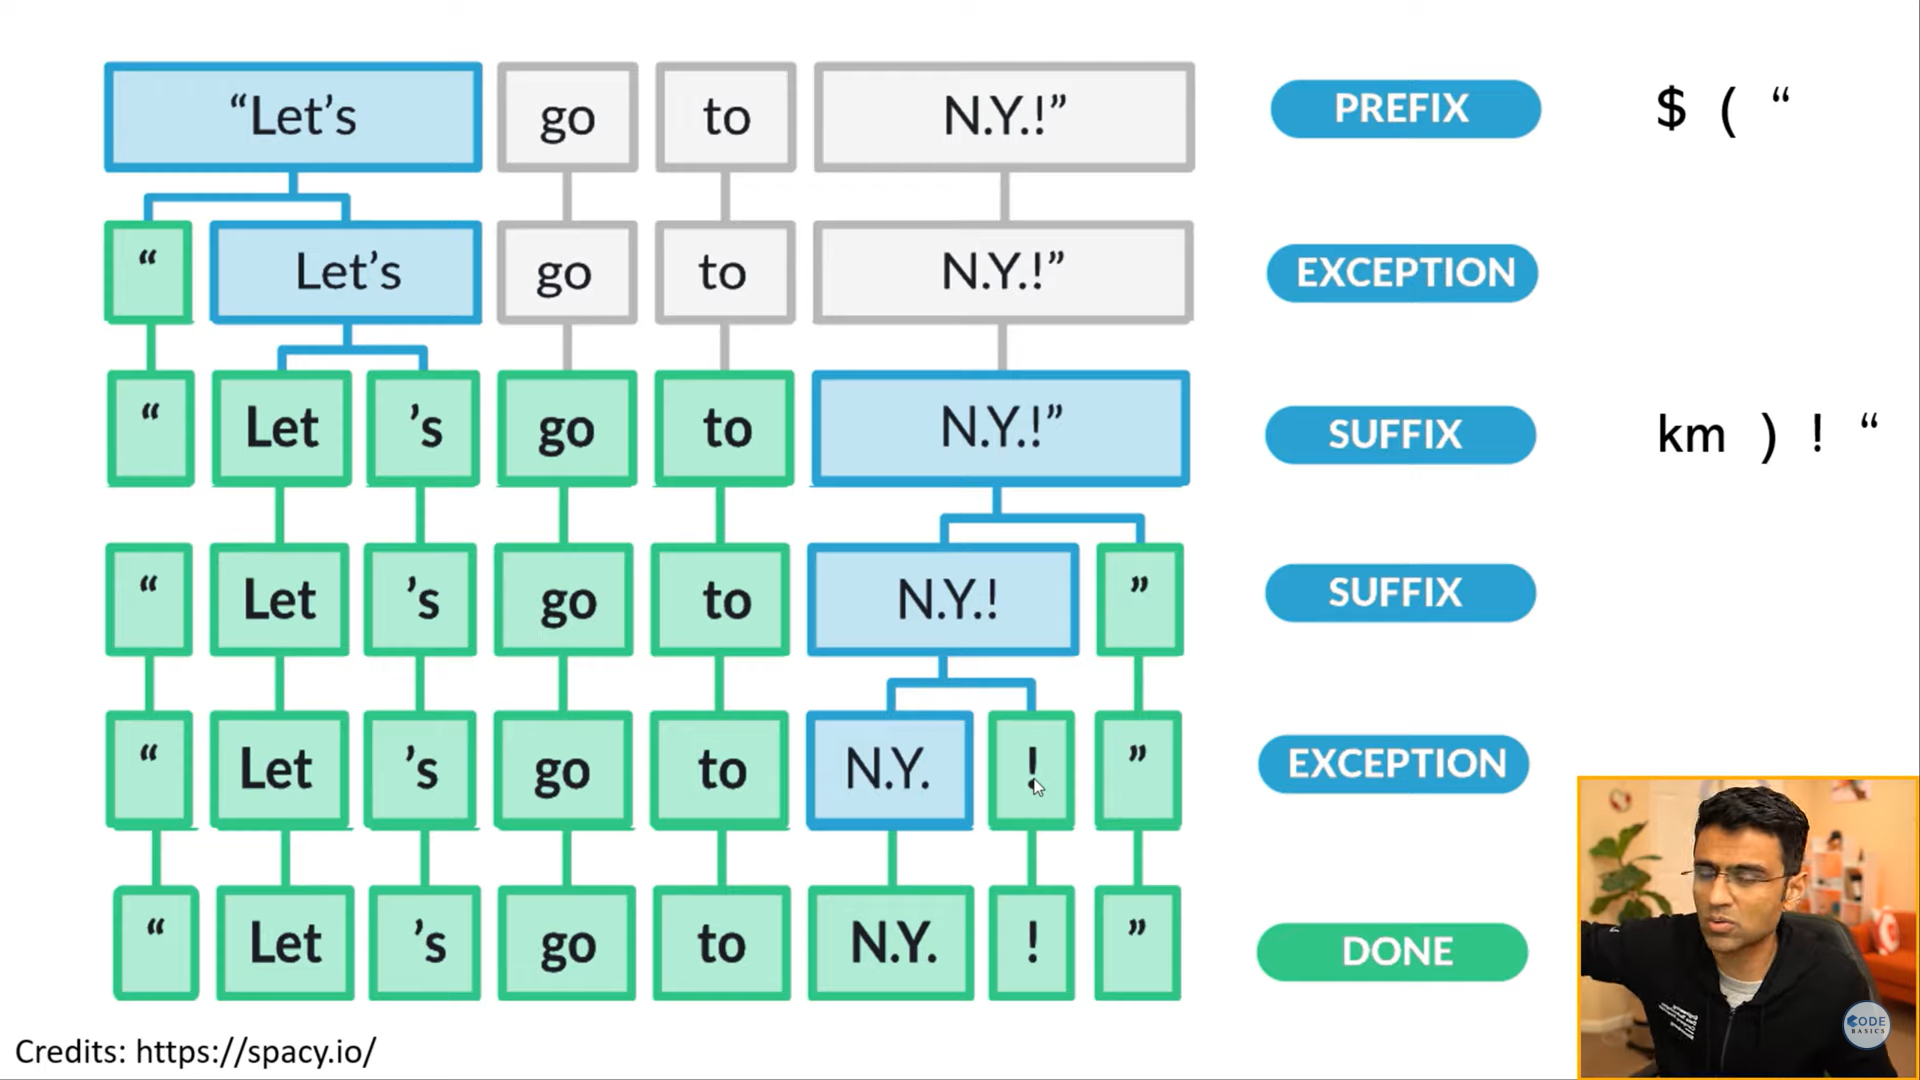

In [57]:
doc=nlp("I have $2 dollars and twenty rupees")
for sentence in doc:
    print(sentence)

I
have
$
2
dollars
and
twenty
rupees


In [74]:
#it supports slicing and indexing
doc0=doc[0]
span=doc[1:5]
print(doc0)
print(span)

I
have $2 dollars


In [59]:
dir(doc0)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'le

In [60]:
type(nlp)

spacy.lang.en.English

In [61]:
type(doc)

spacy.tokens.doc.Doc

In [62]:
type(doc0)

spacy.tokens.token.Token

In [75]:
type(span)

spacy.tokens.span.Span

In [63]:
#checking whether "I" is alphabet or not
doc0.is_alpha

True

In [64]:
#checking whether "I" is number or not
doc0.like_num

False

In [67]:
doc[2]

$

In [73]:
# it is capable of detecting currency symbols
doc[2].is_currency

True

In [69]:
doc[3]

2

In [70]:
#it is capable of detecting numbers
doc[3].like_num

True

In [71]:
doc[6]

twenty

In [72]:
# it is capable of detecting number texts
doc[6].like_num

True

**Extracting Emails**

In [77]:
text='''
Dayton high school, 8th grade students information
==================================================

Name	birth day   	email
-----	------------	------
Virat   5 June, 1882    virat@kohli.com
Maria	12 April, 2001  maria@sharapova.com
Serena  24 June, 1998   serena@williams.com 
Joe      1 May, 1997    joe@root.com
'''
doc=nlp(text)

In [78]:
emails=[]
for word in doc:
    if word.like_email:
        emails.append(word)
emails

[virat@kohli.com, maria@sharapova.com, serena@williams.com, joe@root.com]

# Dealing with Telugu

To check in detail about spacy language models - https://spacy.io/usage/models

In [84]:
nlp=spacy.blank("te")
doc=nlp("మీరు ఎలా ఉన్నారు?. నాకు ₹2 రూపాయలు కావాలి.")
for token in doc:
    print(token)

మీరు
ఎలా
ఉన్నారు
?
.
నాకు
₹
2
రూపాయలు
కావాలి
.


In [85]:
doc[-4]

2

In [86]:
doc[-4].like_num

True

# Customizing Tokenization Rules

In [88]:
nlp=spacy.blank('en')
doc=nlp("I have sixtynine rupees")
for token in doc:
    print(token)

I
have
sixtynine
rupees


In [90]:
#Here I want my model to treat sixtynine as sixty nine
from spacy.tokenizer import ORTH
nlp.tokenizer.add_special_case('sixtynine',[
    {ORTH:'sixty'},
    {ORTH:'nine'}
])
doc=nlp("I have sixtynine rupees")
for token in doc:
    print(token)

I
have
sixty
nine
rupees


In [105]:
doc=nlp("Dr. Strange like Virat Kohli. Hulk likes MS Dhoni.")
#Here it will not work since pipeline is empty"Dr. Strange like Virat Kohli. Hulk likes MS Dhoni."
for sentence in doc.sents:
    print(sentence)

ValueError: [E030] Sentence boundaries unset. You can add the 'sentencizer' component to the pipeline with: `nlp.add_pipe('sentencizer')`. Alternatively, add the dependency parser or sentence recognizer, or set sentence boundaries by setting `doc[i].is_sent_start`.

In [106]:
nlp.pipeline

[]

In [107]:
#adding pipeline
nlp.add_pipe('sentencizer')

In [108]:
nlp.pipeline

[('sentencizer', <spacy.pipeline.sentencizer.Sentencizer at 0x21ba4da2c00>)]

In [109]:
doc=nlp("Dr. Strange like Virat Kohli. Hulk likes MS Dhoni.")
for sentence in doc.sents:
    print(sentence)

Dr. Strange like Virat Kohli.
Hulk likes MS Dhoni.


It has only tokenizer component and pipeline is empty
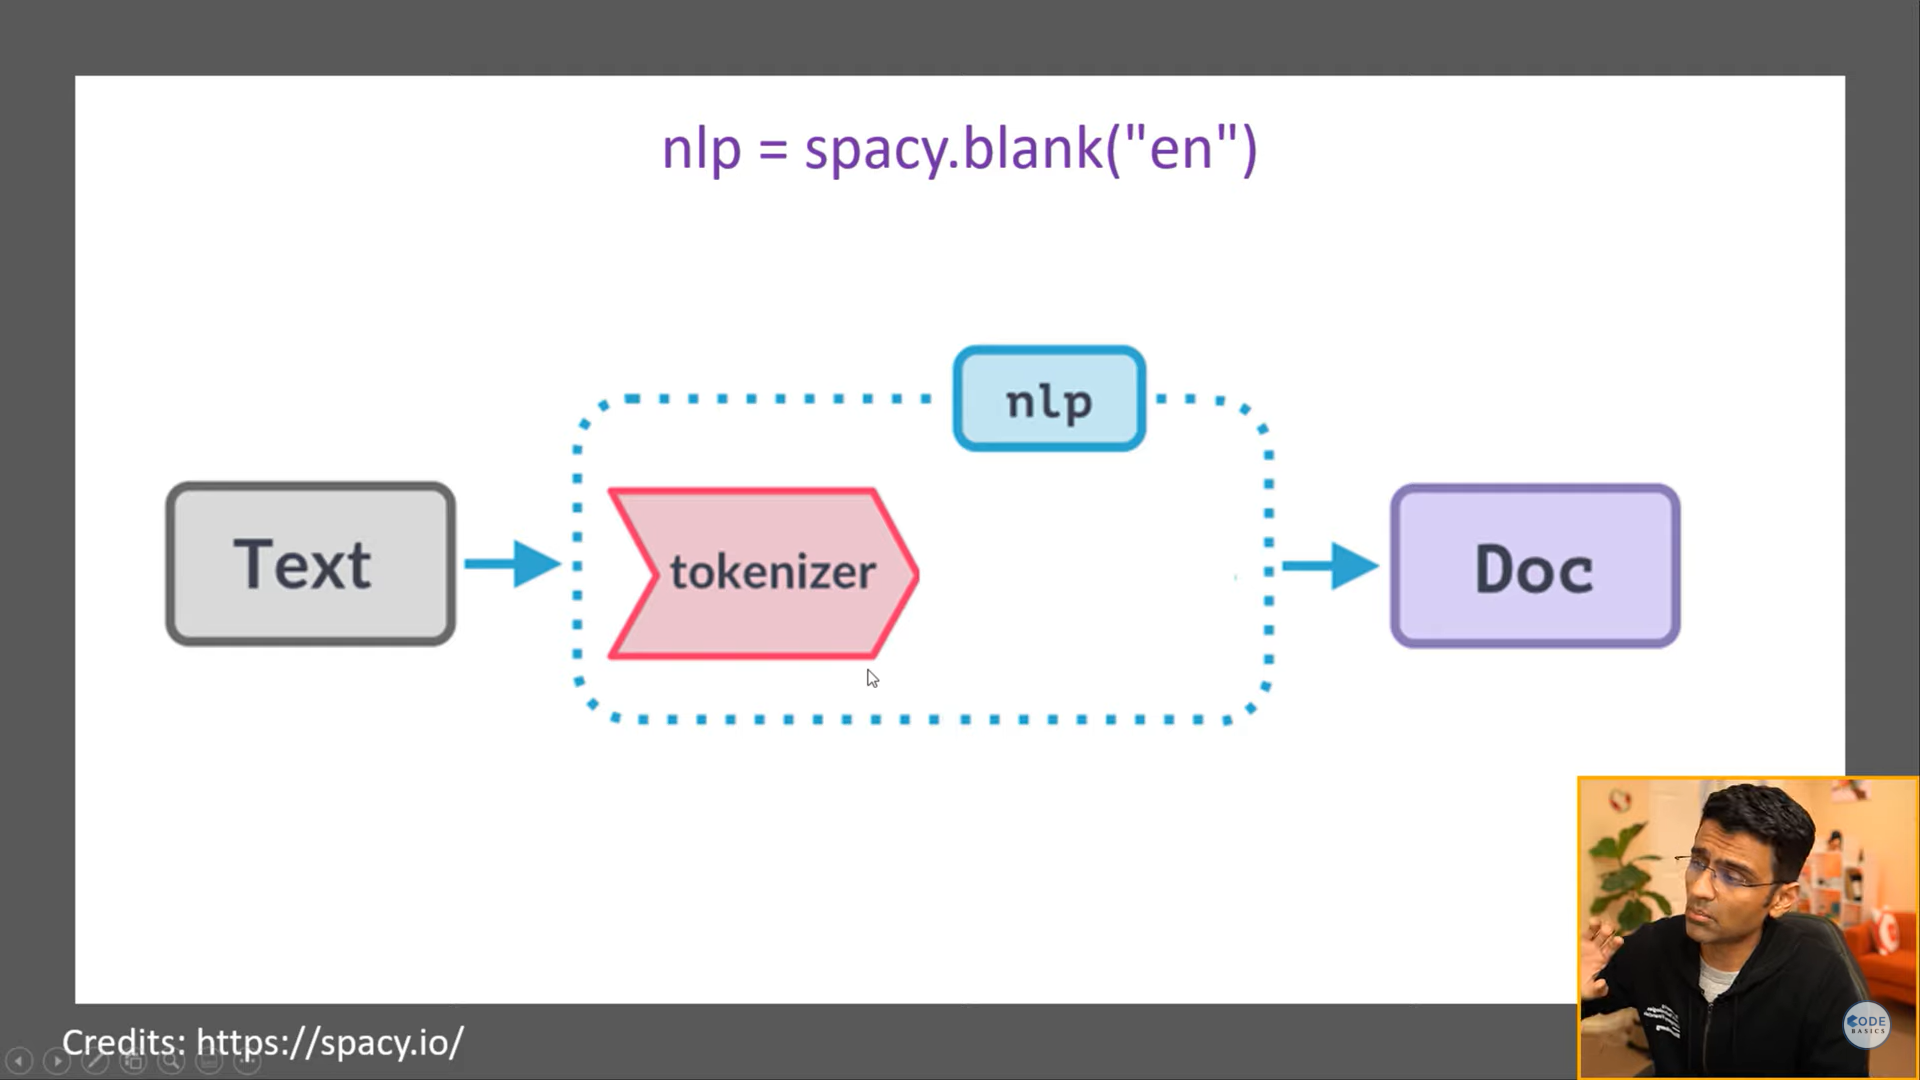

It has a tokenizer and complete pipeline (tagger,parser,ner,..etc) and this pileline is called Language Processing Pipeline.
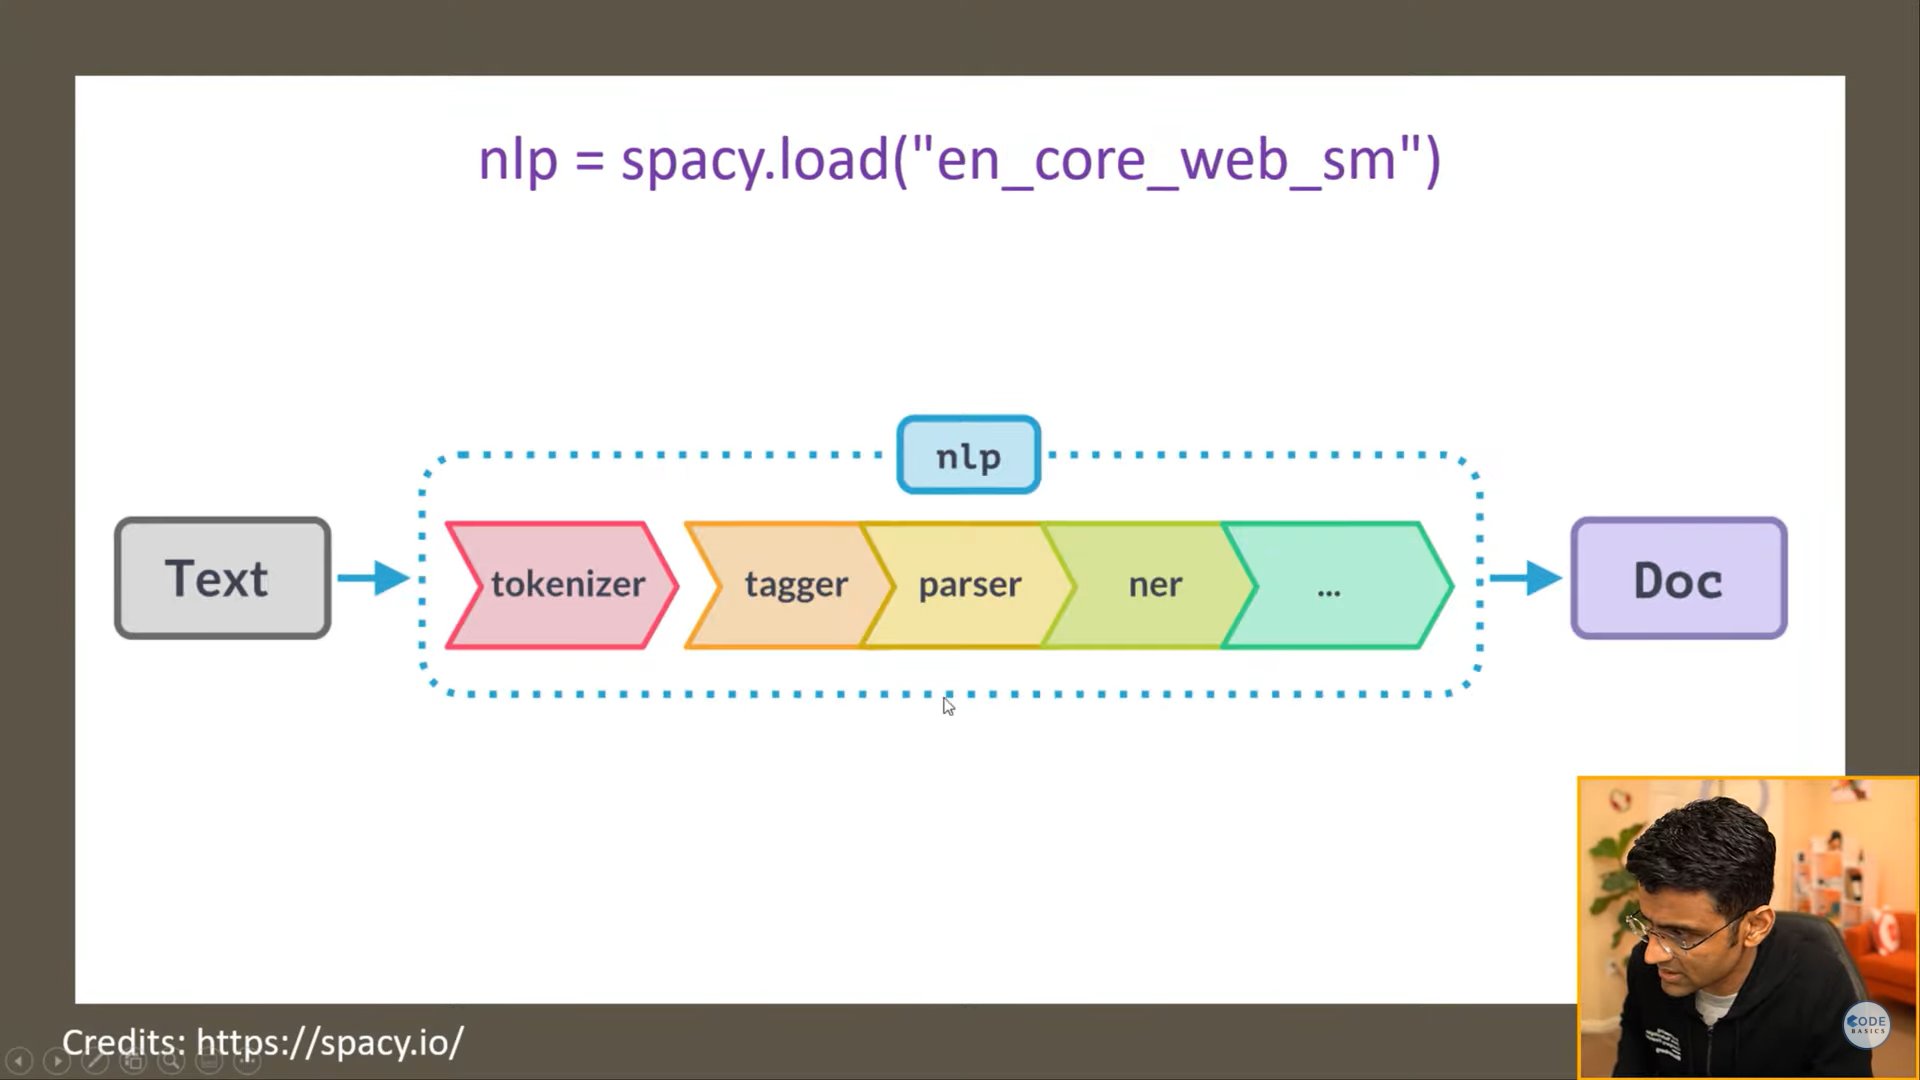

# Exercise

In [110]:
import spacy 

In [111]:
nlp=spacy.blank("en")

In [112]:
text='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

In [113]:
#extracting all the urls
doc=nlp(text)
urls=[]
for token in doc:
    if token.like_url:
        urls.append(token)
urls

[http://www.data.gov/,
 http://www.science,
 http://data.gov.uk/.,
 http://www3.norc.org/gss+website/,
 http://www.europeansocialsurvey.org/.]

In [115]:
#Extract all money transaction from below sentence along with currency. Output should be, --> two $ and 500 €
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"
docs=nlp(transactions)
outputs=[]
for token in docs:
    if token.is_currency:
        outputs.append(docs[token.i - 1].text+" "+token.text)
outputs

['two $', '500 €']

# Language Processing Pipeline

In [116]:
import spacy

https://spacy.io/usage/models

In [117]:
#loading complete pipeline
nlp=spacy.load('en_core_web_sm')

C:\Users\Sharath chandra\AppData\Roaming\Python\Python38\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [126]:
#checking pipelines
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x21ba5991b80>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x21ba2fcb760>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x21ba5034430>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x21ba307a200>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x21ba58df640>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x21ba55b4500>)]

In [128]:
doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")
for token in doc:
    print(token)

Captain
america
ate
100
$
of
samosa
.
Then
he
said
I
can
do
this
all
day
.


In [127]:
#getting pipeline names
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']

In [129]:
# Getting parts of speech and lemmatization for tokens
doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")
for token in doc:
    print(token," | ",token.pos_," | ",token.lemma_)
    #pos_ --> stands for "parts of speech" belongs to tagger component
    #lemma_ belongs to lemmatizer (reducing word to its root)

Captain  |  NOUN  |  captain
america  |  NOUN  |  america
ate  |  VERB  |  eat
100  |  NUM  |  100
$  |  NOUN  |  $
of  |  ADP  |  of
samosa  |  NOUN  |  samosa
.  |  PUNCT  |  .
Then  |  ADV  |  then
he  |  PRON  |  he
said  |  VERB  |  say
I  |  PRON  |  I
can  |  AUX  |  can
do  |  VERB  |  do
this  |  DET  |  this
all  |  DET  |  all
day  |  NOUN  |  day
.  |  PUNCT  |  .


In [144]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents: # it belongs to 'ner' --> Named Entity Recognition
    print(ent.text," | ", ent.label_," | ",spacy.explain(ent.label_))

Tesla Inc  |  PERSON  |  People, including fictional
$45 billion  |  MONEY  |  Monetary values, including unit


In [145]:
from spacy import displacy

Displacy is a visualization tool provided by the spaCy library, which is a popular natural language processing (NLP) library in Python. Displacy is used to visually represent and analyze linguistic annotations produced by spaCy's NLP pipeline. It helps users understand the structural and semantic aspects of text data through interactive and colorful visualizations.

values that can be used for style attribute are :   
1. 'dep' : This style displays the dependency parse tree of the sentence.
2. 'ent' : This style highlights named entities in the text.
3. 'ent,dep' : This style combines both the dependency parse tree and the named entity highlighting.
4. 'ent.tag' : This style highlights both named entities and their part-of-speech tags.
5. 'dep.tag' : This style displays both the dependency parse tree and the part-of-speech tags.
6. 'ent.tag,dep.tag' : This style combines named entity highlighting, dependency parse tree visualization, and part-of-speech tag highlighting.

In [153]:
displacy.render(doc,style='ent')

In [154]:
displacy.render(doc,style='dep')

# Add the component to blank pipeline

In [162]:
#adding component
nlp_wl=spacy.blank('en')
print(nlp_wl.pipe_names)
nlp_wl.add_pipe('ner')
print(nlp_wl.pipe_names)

[]
['ner']


In [164]:
#adding component from another trained pipeline
#nlp=spacy.load('en_core_web_sm')
nlp_wl=spacy.blank('en')
print(nlp_wl.pipe_names)
nlp_wl.add_pipe('ner',source=nlp)
print(nlp_wl.pipe_names)

[]
['ner']


In [160]:
nlp_wl.pipe_names

['ner']

# Excercise

In [48]:
import spacy

nlp = spacy.load("en_core_web_sm") 

In [49]:
text = '''Ravi and Raju are the best friends from school days.They wanted to go for a world tour and 
visit famous cities like Paris, London, Dubai, Rome etc and also they called their another friend Mohan to take part of this world tour.
They started their journey from Hyderabad and spent next 3 months travelling all the wonderful cities in the world and cherish a happy moments!
'''

**Excersie: 1**  
Get all the proper nouns from a given text in a list and also count how many of them.     
**Proper Noun** means a noun that names a particular person, place, or thing.

In [50]:
doc=nlp(text)
proper_nouns=[]
for word in doc:
    if word.pos_=='PROPN':
        proper_nouns.append(word)
print(proper_nouns)
print("Count :",len(proper_nouns))

[Ravi, Raju, Paris, London, Dubai, Rome, etc, Mohan, Hyderabad]
Count : 9


**Excersie: 2**        
Get all **companies names** from a given text and also the count of them.

In [51]:
text = '''The Top 5 companies in USA are Tesla, Walmart, Amazon, Microsoft, Google and the top 5 companies in 
India are Infosys, Reliance, HDFC Bank, Hindustan Unilever and Bharti Airtel'''

doc = nlp(text)

In [52]:
companies=[]
for ent in doc.ents:
    if ent.label_=="ORG":
        companies.append(ent)
companies

[Amazon,
 Microsoft,
 Infosys,
 Reliance,
 HDFC Bank,
 Hindustan Unilever,
 Bharti Airtel]

# Stemming and Lemmatization

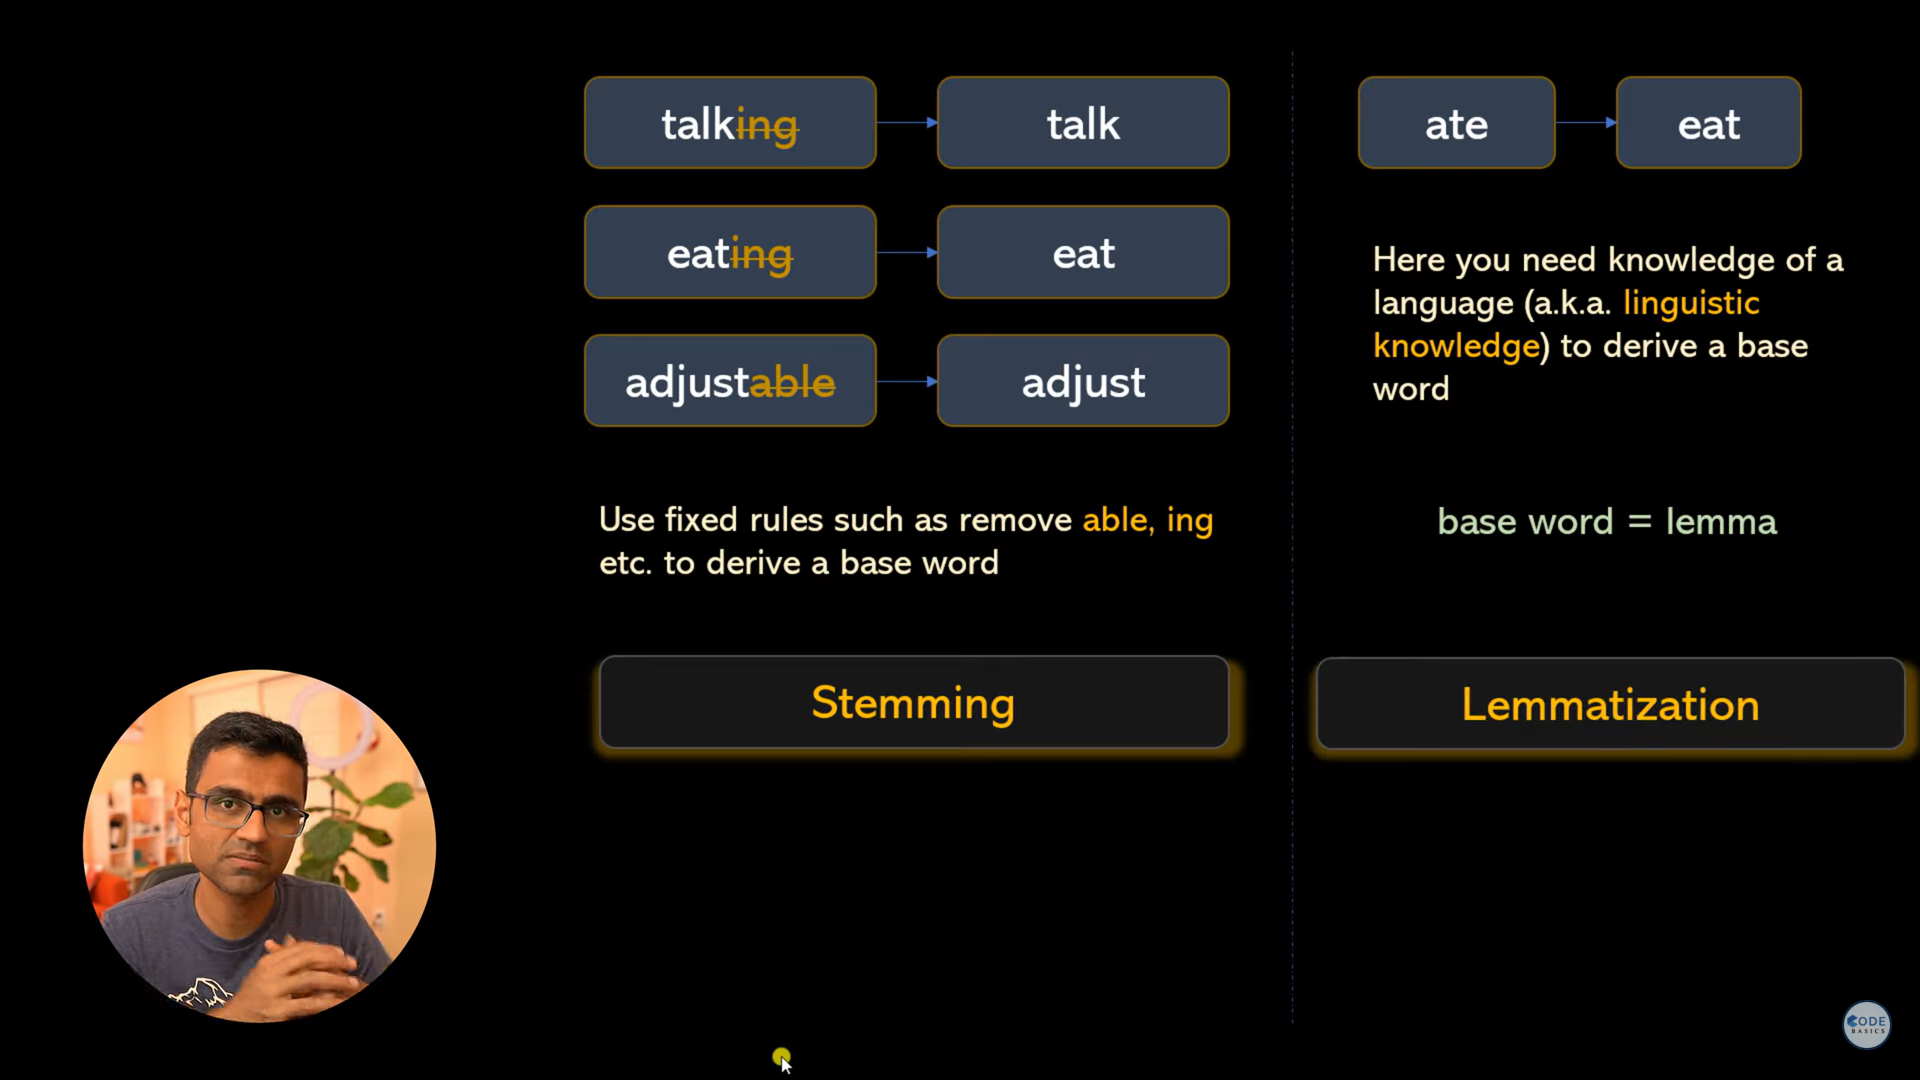

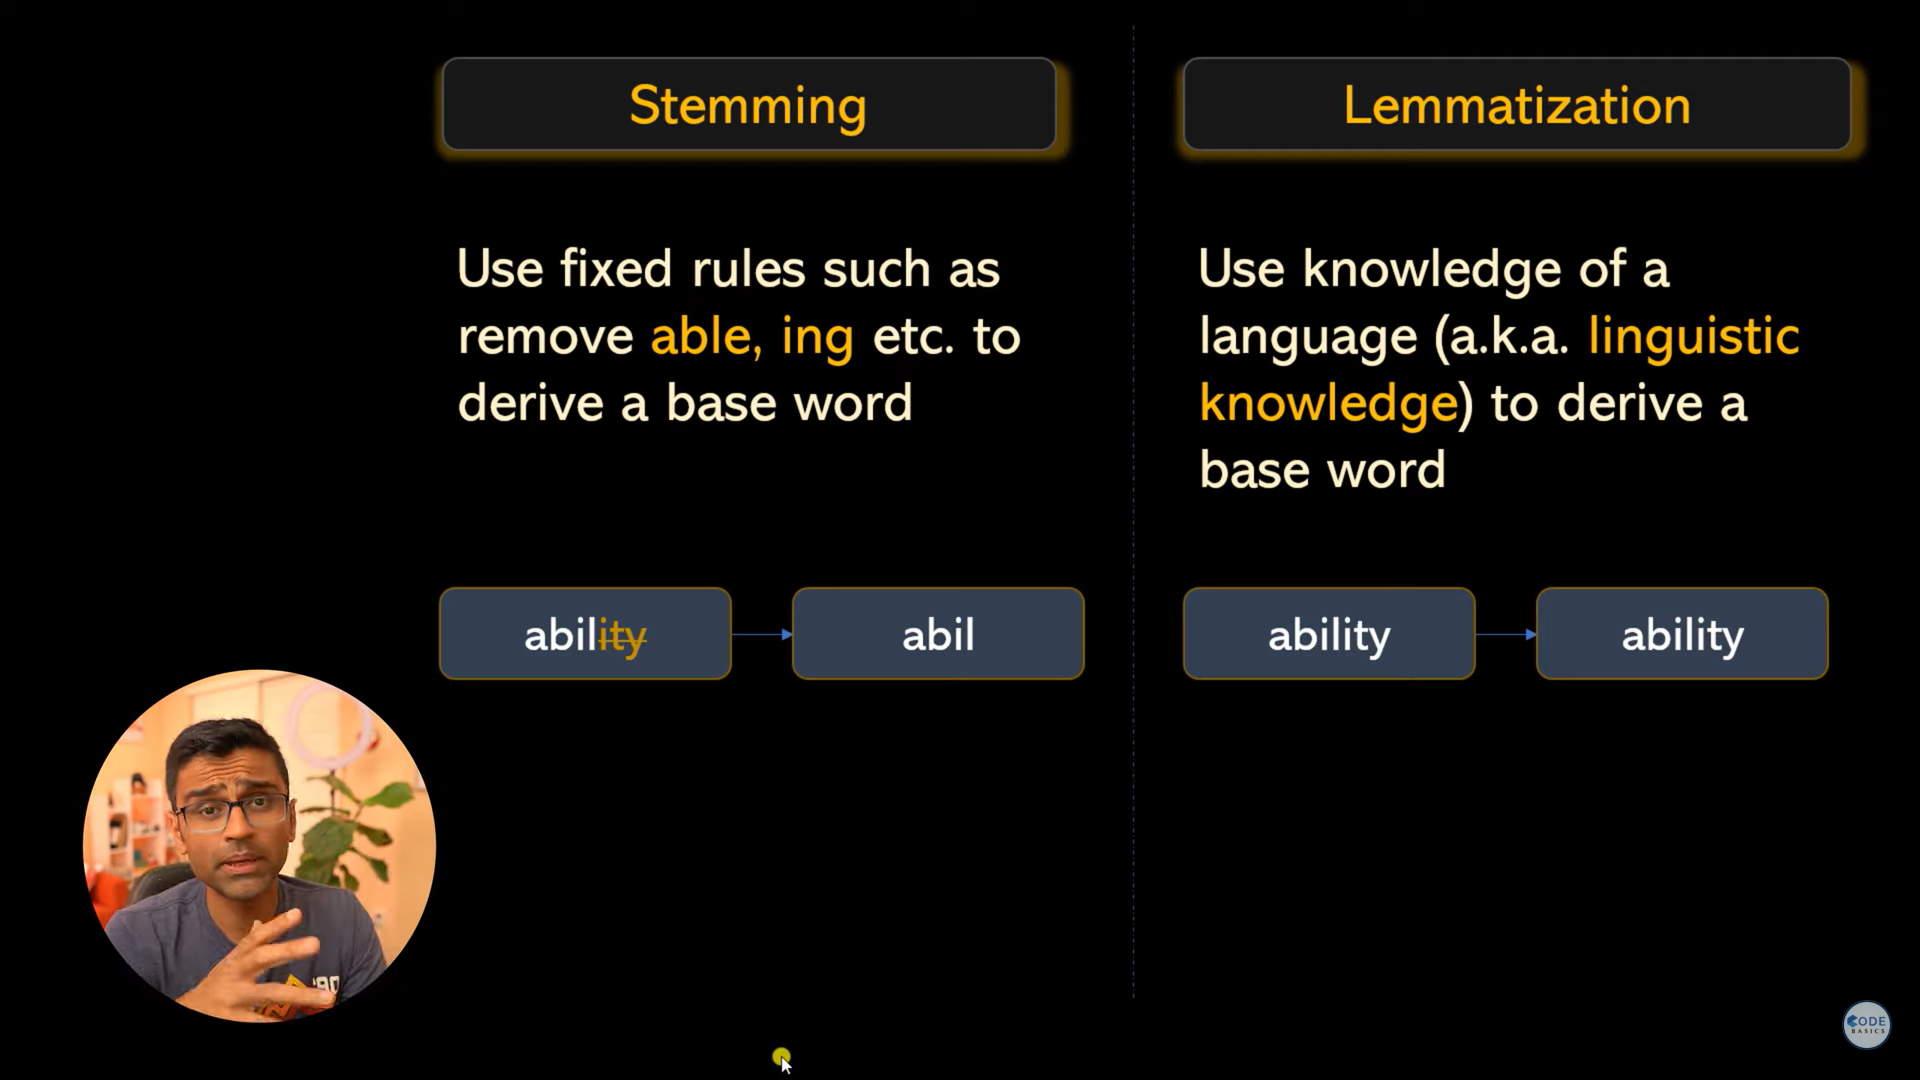

**Spacy supports only Lemmatization**   
**NLTK supports both Stemming and Lemmatization**

# Stemming in NLTK

In [1]:
import nltk

In [2]:
from nltk.stem import PorterStemmer

In [6]:
stemmer=PorterStemmer()
words = ["eating", "eats", "eat", "ate", "adjustable", "rafting", "ability", "meeting"]
for word in words:
    print(word," | ",stemmer.stem(word))

eating  |  eat
eats  |  eat
eat  |  eat
ate  |  ate
adjustable  |  adjust
rafting  |  raft
ability  |  abil
meeting  |  meet


# Lemmatization in spacy

In [53]:
import spacy

In [54]:
nlp=spacy.load('en_core_web_sm') #here sm--> small model

In [55]:
text="eating eats eat ate adjustable rafting ability meeting better"
doc = nlp(text)
for token in doc:
    print(token, " | ", token.lemma_," | ",token.lemma) # here lemma gives the index of that word from a list of words used for training

eating  |  eat  |  9837207709914848172
eats  |  eat  |  9837207709914848172
eat  |  eat  |  9837207709914848172
ate  |  eat  |  9837207709914848172
adjustable  |  adjustable  |  6033511944150694480
rafting  |  rafting  |  1196139325854331
ability  |  ability  |  11565809527369121409
meeting  |  meeting  |  14798207169164081740
better  |  well  |  4525988469032889948


**Customizing Lemmatizor**

In [56]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']

In [57]:
doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")
for token in doc:
    print(token.text, "|", token.lemma_)

Bro | bro
, | ,
you | you
wanna | wanna
go | go
? | ?
Brah | Brah
, | ,
do | do
n't | n't
say | say
no | no
! | !
I | I
am | be
exhausted | exhaust


Here we know that "Bro" and "Brah" refers to "Brother".   
So customize those words as "Brother".

In [58]:
#'attribute_ruler' is used to customize lemmatizor
ar=nlp.get_pipe("attribute_ruler")
ar.add([[{"TEXT":"Bro"}],[{"TEXT":"Brah"}]],{"LEMMA":"Brother"})
doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")
for token in doc:
    print(token.text, "|", token.lemma_)

Bro | Brother
, | ,
you | you
wanna | wanna
go | go
? | ?
Brah | Brother
, | ,
do | do
n't | n't
say | say
no | no
! | !
I | I
am | be
exhausted | exhaust


# Excercise

**Exercise1:**     
Convert these list of words into base form using Stemming and Lemmatization and observe the transformations

In [62]:
#stemming using nltk
import nltk
from nltk.stem import PorterStemmer

In [63]:
stemmer=PorterStemmer()

In [64]:
lst_words = ['running', 'painting', 'walking', 'dressing', 'likely', 'children', 'whom', 'good', 'ate', 'fishing']
for word in lst_words:
    print(word," | ",stemmer.stem(word))

running  |  run
painting  |  paint
walking  |  walk
dressing  |  dress
likely  |  like
children  |  children
whom  |  whom
good  |  good
ate  |  ate
fishing  |  fish


In [65]:
#Lemmatization using spacy
import spacy
nlp=spacy.load("en_core_web_sm")

C:\Users\Sharath chandra\AppData\Roaming\Python\Python38\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [66]:
doc = nlp("running painting walking dressing likely children who good ate fishing")
for token in doc:
    print(token," | ",token.lemma_)

running  |  run
painting  |  painting
walking  |  walking
dressing  |  dress
likely  |  likely
children  |  child
who  |  who
good  |  good
ate  |  eat
fishing  |  fish


**Exercise2:**   
convert the given text into it's base form using both stemming and lemmatization

In [67]:
text = """Latha is very multi talented girl.She is good at many skills like dancing, running, singing, playing.She also likes eating Pav Bhagi. she has a 
habit of fishing and swimming too.Besides all this, she is a wonderful at cooking too.
"""

In [71]:
#using stemming in nltk

#step1: Word tokenizing
all_word_tokens = nltk.tokenize.word_tokenize(text)


#step2: getting the base form for each token using stemmer
all_base_words = []

for token in all_word_tokens:
  base_form = stemmer.stem(token)
  all_base_words.append(base_form)


#step3: joining all words in a list into string using 'join()'
final_base_text = ' '.join(all_base_words)
print(final_base_text)

latha is veri multi talent girl.sh is good at mani skill like danc , run , sing , playing.sh also like eat pav bhagi . she ha a habit of fish and swim too.besid all thi , she is a wonder at cook too .


In [72]:
## using lemmatisation in spacy


#step1: Creating the object for the given text
doc = nlp(text)
all_base_words = []

#step2: getting the base form for each token using spacy 'lemma_'
for token in doc:
    base_word =  token.lemma_
    all_base_words.append(base_word)


#step3: joining all words in a list into string using 'join()'
final_base_text = ' '.join(all_base_words)
print(final_base_text)

Latha be very multi talented girl . she be good at many skill like dance , run , singing , playing . she also like eat Pav Bhagi . she have a 
 habit of fishing and swim too . besides all this , she be a wonderful at cook too . 



# Part Of Speech(POS) Tagging

In [73]:
import spacy
nlp=spacy.load('en_core_web_sm')

C:\Users\Sharath chandra\AppData\Roaming\Python\Python38\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


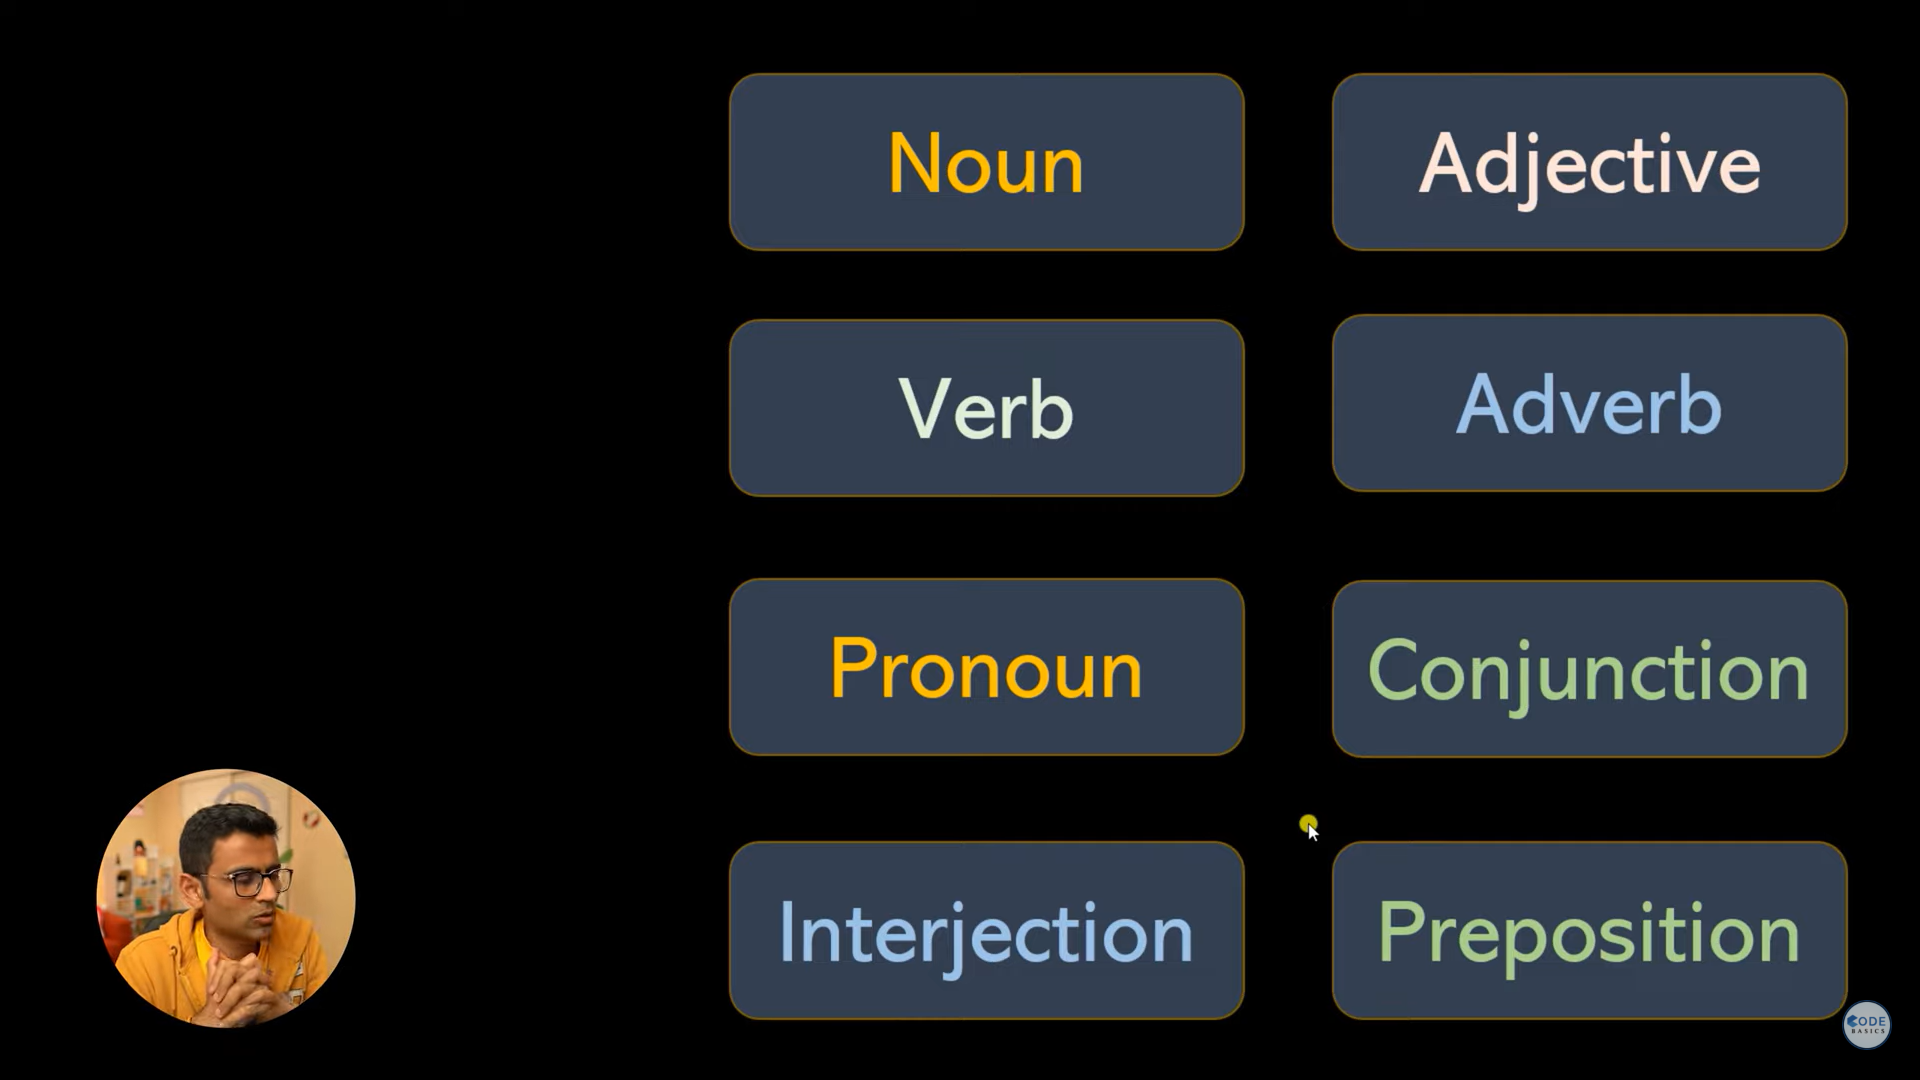

**Part of Speech**     
List of all POS in spacy - https://spacy.io/usage/linguistic-features

In [74]:
doc = nlp("Elon flew to mars yesterday. He carried biryani masala with him")
for token in doc:
    print(token," | ",token.pos_," | ",spacy.explain(token.pos_))

Elon  |  NOUN  |  noun
flew  |  VERB  |  verb
to  |  ADP  |  adposition
mars  |  NOUN  |  noun
yesterday  |  NOUN  |  noun
.  |  PUNCT  |  punctuation
He  |  PRON  |  pronoun
carried  |  VERB  |  verb
biryani  |  NOUN  |  noun
masala  |  NOUN  |  noun
with  |  ADP  |  adposition
him  |  PRON  |  pronoun


In [75]:
#taking another sentence as example
doc = nlp("Wow! Dr. Strange made 265 million $ on the very first day")

for token in doc:
    print(token," | ", token.pos_, " | ", spacy.explain(token.pos_))

Wow  |  INTJ  |  interjection
!  |  PUNCT  |  punctuation
Dr.  |  PROPN  |  proper noun
Strange  |  PROPN  |  proper noun
made  |  VERB  |  verb
265  |  NUM  |  numeral
million  |  NUM  |  numeral
$  |  NOUN  |  noun
on  |  ADP  |  adposition
the  |  DET  |  determiner
very  |  ADV  |  adverb
first  |  ADJ  |  adjective
day  |  NOUN  |  noun


**Tags**

In [76]:
# it gives information about tenses also
doc = nlp("Wow! Dr. Strange made 265 million $ on the very first day")

for token in doc:
    print(token," | ", token.pos_, " | ", spacy.explain(token.pos_), " | ", token.tag_, " | ", spacy.explain(token.tag_))

Wow  |  INTJ  |  interjection  |  UH  |  interjection
!  |  PUNCT  |  punctuation  |  .  |  punctuation mark, sentence closer
Dr.  |  PROPN  |  proper noun  |  NNP  |  noun, proper singular
Strange  |  PROPN  |  proper noun  |  NNP  |  noun, proper singular
made  |  VERB  |  verb  |  VBD  |  verb, past tense
265  |  NUM  |  numeral  |  CD  |  cardinal number
million  |  NUM  |  numeral  |  CD  |  cardinal number
$  |  NOUN  |  noun  |  NN  |  noun, singular or mass
on  |  ADP  |  adposition  |  IN  |  conjunction, subordinating or preposition
the  |  DET  |  determiner  |  DT  |  determiner
very  |  ADV  |  adverb  |  RB  |  adverb
first  |  ADJ  |  adjective  |  JJ  |  adjective (English), other noun-modifier (Chinese)
day  |  NOUN  |  noun  |  NN  |  noun, singular or mass


**In below sentences Spacy figures out the past vs present tense for quit**

In [77]:
doc = nlp("He quits the job")

print(doc[1].text, "|", doc[1].tag_, "|", spacy.explain(doc[1].tag_))

quits | VBZ | verb, 3rd person singular present


In [78]:
doc = nlp("he quit the job")

print(doc[1].text, "|", doc[1].tag_, "|", spacy.explain(doc[1].tag_))

quit | VBD | verb, past tense


**Removing all SPACE, PUNCT and X token from text**

In [79]:
earnings_text="""Microsoft Corp. today announced the following results for the quarter ended December 31, 2021, as compared to the corresponding period of last fiscal year:

·         Revenue was $51.7 billion and increased 20%
·         Operating income was $22.2 billion and increased 24%
·         Net income was $18.8 billion and increased 21%
·         Diluted earnings per share was $2.48 and increased 22%
“Digital technology is the most malleable resource at the world’s disposal to overcome constraints and reimagine everyday work and life,” said Satya Nadella, chairman and chief executive officer of Microsoft. “As tech as a percentage of global GDP continues to increase, we are innovating and investing across diverse and growing markets, with a common underlying technology stack and an operating model that reinforces a common strategy, culture, and sense of purpose.”
“Solid commercial execution, represented by strong bookings growth driven by long-term Azure commitments, increased Microsoft Cloud revenue to $22.1 billion, up 32% year over year” said Amy Hood, executive vice president and chief financial officer of Microsoft."""

doc = nlp(earnings_text)

filtered_tokens = []

for token in doc:
    if token.pos_ not in ["SPACE", "PUNCT", "X"]:
        filtered_tokens.append(token)

In [80]:
filtered_tokens[:10]

[Microsoft,
 Corp.,
 today,
 announced,
 the,
 following,
 results,
 for,
 the,
 quarter]

In [85]:
#getting the count of POS in a given context.
count=doc.count_by(spacy.attrs.POS)
count

{96: 16,
 92: 46,
 100: 23,
 90: 10,
 85: 17,
 93: 16,
 97: 27,
 84: 19,
 103: 10,
 87: 5,
 99: 5,
 89: 12,
 86: 3,
 94: 3,
 95: 1}

Here, the keys are indexes of Vocab list

In [87]:
doc.vocab[96].text

'PROPN'

In [89]:
for k,v in count.items():
    print(doc.vocab[k].text," : ",v)

PROPN  :  16
NOUN  :  46
VERB  :  23
DET  :  10
ADP  :  17
NUM  :  16
PUNCT  :  27
ADJ  :  19
SPACE  :  10
AUX  :  5
SYM  :  5
CCONJ  :  12
ADV  :  3
PART  :  3
PRON  :  1


# Excercise

**Reading the file into the python to extract the text**

In [103]:
#reading data from the external text file
with open("D:\programming languages\datasets\sample_news_story_on_inflation.txt") as f:
    data=f.readlines()
data

['Inflation rose again in April, continuing a climb that has pushed consumers to the brink and is threatening the economic expansion, the Bureau of Labor Statistics reported Wednesday.\n',
 '\n',
 'The consumer price index, a broad-based measure of prices for goods and services, increased 8.3% from a year ago, higher than the Dow Jones estimate for an 8.1% gain. That represented a slight ease from Marchâ€™s peak but was still close to the highest level since the summer of 1982.\n',
 '\n',
 'Removing volatile food and energy prices, so-called core CPI still rose 6.2%, against expectations for a 6% gain, clouding hopes that inflation had peaked in March.\n',
 '\n',
 'The month-over-month gains also were higher than expectations â€” 0.3% on headline CPI versus the 0.2% estimate and a 0.6% increase for core, against the outlook for a 0.4% gain.\n',
 '\n',
 'The price gains also meant that workers continued to lose ground. Real wages adjusted for inflation decreased 0.1% on the month despit

In [105]:
#converting the list into the string
text="\n".join(data)
text

'Inflation rose again in April, continuing a climb that has pushed consumers to the brink and is threatening the economic expansion, the Bureau of Labor Statistics reported Wednesday.\n\n\n\nThe consumer price index, a broad-based measure of prices for goods and services, increased 8.3% from a year ago, higher than the Dow Jones estimate for an 8.1% gain. That represented a slight ease from Marchâ€™s peak but was still close to the highest level since the summer of 1982.\n\n\n\nRemoving volatile food and energy prices, so-called core CPI still rose 6.2%, against expectations for a 6% gain, clouding hopes that inflation had peaked in March.\n\n\n\nThe month-over-month gains also were higher than expectations â€” 0.3% on headline CPI versus the 0.2% estimate and a 0.6% increase for core, against the outlook for a 0.4% gain.\n\n\n\nThe price gains also meant that workers continued to lose ground. Real wages adjusted for inflation decreased 0.1% on the month despite a nominal increase of 0

**Extracting all the nouns**

In [122]:
doc=nlp(text)
nouns=[]
for token in doc:
    if token.pos_=="NOUN" or token.pos_=="PROPN":
        nouns.append(token)
nouns[:5]

[Inflation, April, climb, consumers, brink]

We can see that it's not working properly. But that's not our problem dude.

**Extract all numbers(NUM POS) type in python list**

In [115]:
doc=nlp(text)
numbers=[]
for token in doc:
    if token.pos_=="NUM":
        numbers.append(token)
numbers

[8.3,
 8.1,
 1982,
 6.2,
 6,
 0.3,
 0.2,
 0.6,
 0.4,
 0.1,
 0.3,
 2.6,
 5.5,
 2021,
 1984,
 one,
 two,
 two,
 2]

**Print the count of all POS tags**

In [118]:
count=doc.count_by(spacy.attrs.POS)
count

{92: 96,
 100: 34,
 86: 15,
 85: 38,
 96: 17,
 97: 32,
 90: 37,
 87: 9,
 89: 10,
 84: 23,
 103: 7,
 93: 19,
 98: 9,
 94: 4,
 95: 1,
 101: 1}

In [121]:
for k,v in count.items():
    print(doc.vocab[k].text," : ",v)

NOUN  :  96
VERB  :  34
ADV  :  15
ADP  :  38
PROPN  :  17
PUNCT  :  32
DET  :  37
AUX  :  9
CCONJ  :  10
ADJ  :  23
SPACE  :  7
NUM  :  19
SCONJ  :  9
PART  :  4
PRON  :  1
X  :  1


# Named Entity Recognition (NER)
**Real-time use cases of NER :**   
1. Search
2. Recommendation
3. Customer Support

In [2]:
import spacy
nlp=spacy.load("en_core_web_sm")

C:\Users\Sharath chandra\AppData\Roaming\Python\Python38\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [3]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']

In [7]:
doc=nlp("Tesla acquired Twitter for $45 billion.")
for entity in doc.ents:
    print(entity,"|",entity.label_)

Tesla | ORG
Twitter | PRODUCT
$45 billion | MONEY


In [10]:
doc=nlp("Tesla acquired Twitter Inc for $45 billion.")
for entity in doc.ents:
    print(entity,"|",entity.label_)

Tesla | ORG
Twitter Inc | ORG
$45 billion | MONEY


Here we can observe that if add "Inc" to Twitter then it is able to recognize it as ORG. It means that it is following some fixed set of rules.

In [12]:
doc=nlp("Tesla acquired Twitter Inc for $45 billion.")
for entity in doc.ents:
    print(entity,"|",entity.label_,"|",spacy.explain(entity.label_))

Tesla | ORG | Companies, agencies, institutions, etc.
Twitter Inc | ORG | Companies, agencies, institutions, etc.
$45 billion | MONEY | Monetary values, including unit


In [13]:
# displacy is helpful to display in a better way
from spacy import displacy
displacy.render(doc,style="ent")

In [17]:
# getting all the labels or entities that are available in spacy's NER
nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [18]:
# slicing object can be referred as a 'span'
type(doc[1:3])

spacy.tokens.span.Span

In [21]:
doc=nlp("Tesla is ecquiring Twitter for $45 billion.")
for entity in doc.ents:
    print(entity,"|",entity.label_,"|",spacy.explain(entity.label_))

Tesla | ORG | Companies, agencies, institutions, etc.
Twitter | PRODUCT | Objects, vehicles, foods, etc. (not services)
$45 billion | MONEY | Monetary values, including unit


Here, we can observe that it recognized 'Twitter' as a Product instead of Organization

**Setting the  custom Entity**

In [22]:
from spacy.tokens import Span
span1=Span(doc,3,4,label="ORG") # 3 (index) -> refers to 'Twitter' and 4 (index) -> excluding
doc.set_ents([span1],default="unmodified")

In [23]:
for entity in doc.ents:
    print(entity,"|",entity.label_,"|",spacy.explain(entity.label_))

Tesla | ORG | Companies, agencies, institutions, etc.
Twitter | ORG | Companies, agencies, institutions, etc.
$45 billion | MONEY | Monetary values, including unit


**Huggingface BERT based NER model:** https://huggingface.co/dslim/bert-base-NER

**My Excercise**😎

In [25]:
doc=nlp("MS Dhoni is a former Indian Captain.")
for entity in doc.ents:
    print(entity,"|",entity.label_,"|",spacy.explain(entity.label_))

Indian | NORP | Nationalities or religious or political groups


In [30]:
# defining MS Dhoni as a Legend
span1=Span(doc,0,2,label="Legend")
doc.set_ents([span1],default="unmodified")

In [31]:
for entity in doc.ents:
    print(entity,"|",entity.label_)

MS Dhoni | Legend
Indian | NORP


**Approaches to build NER System**

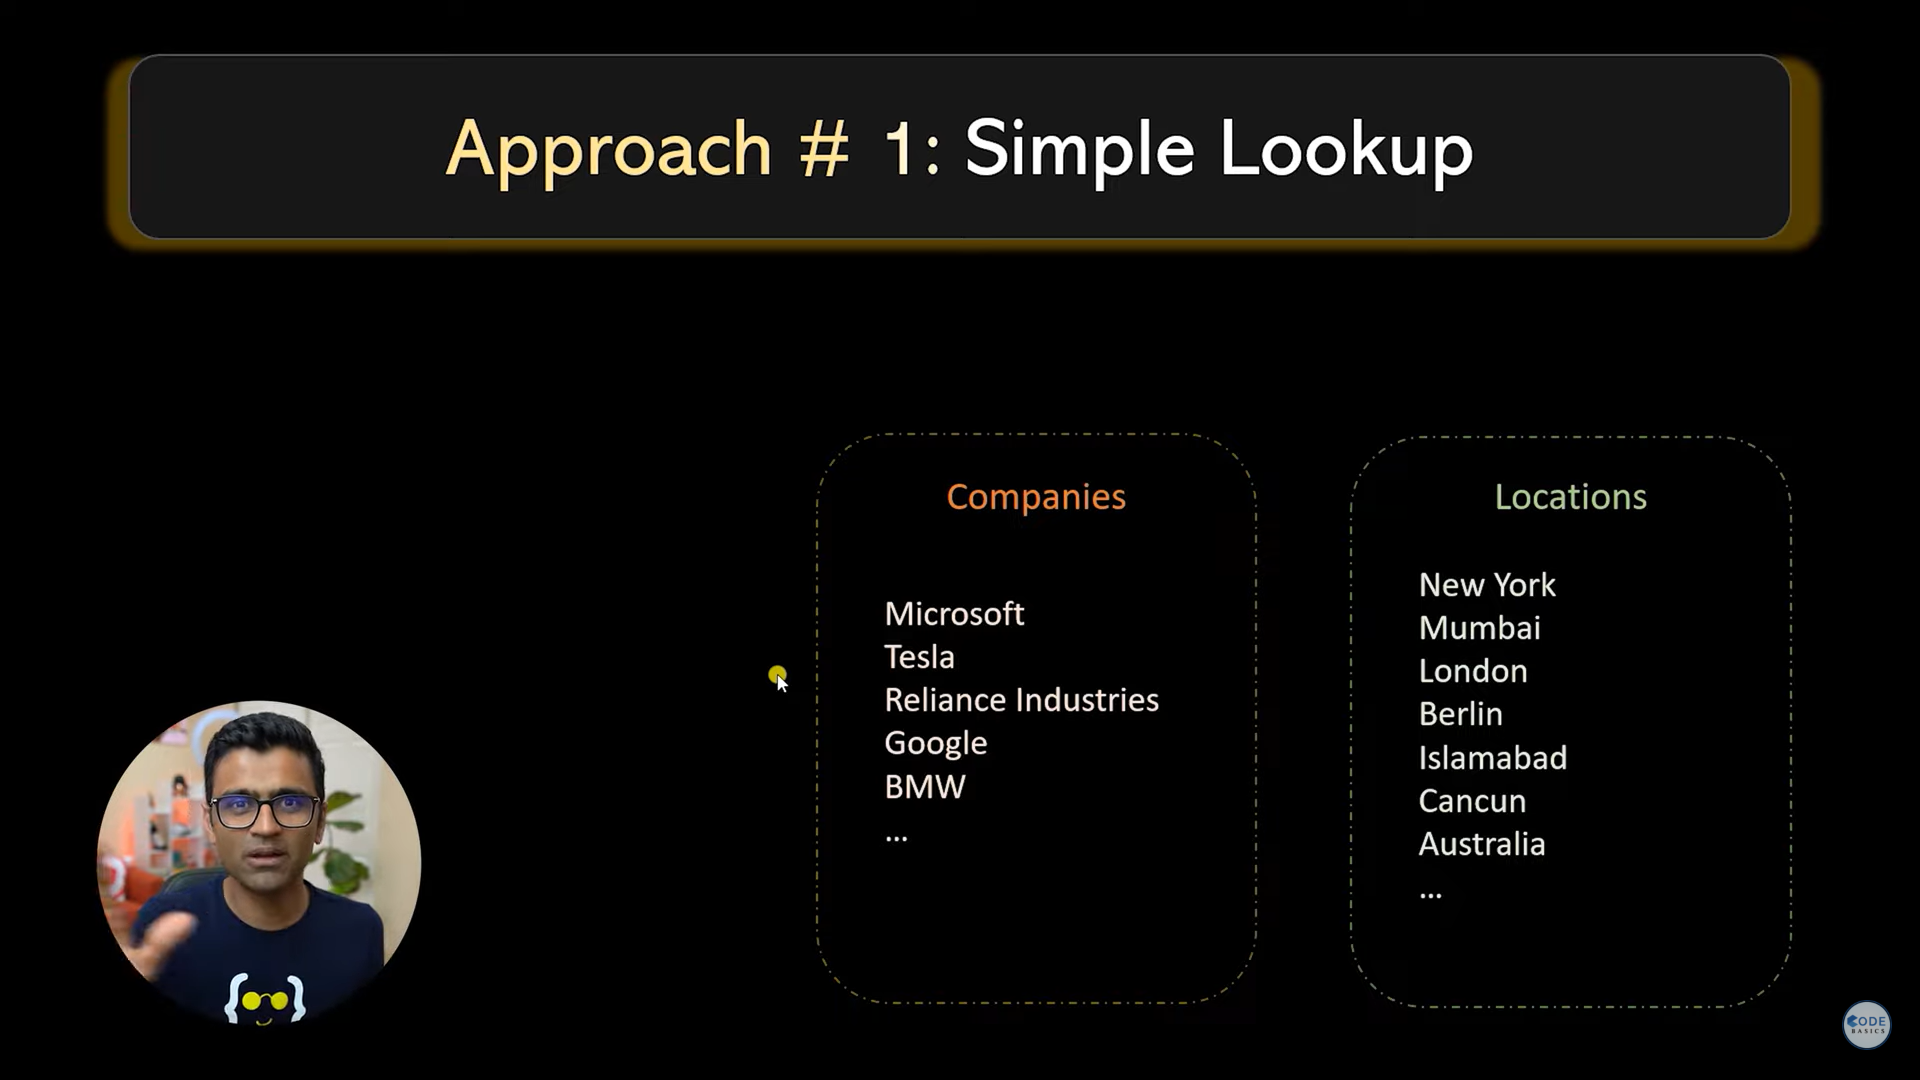 
simply adding of the new words or entities into the database of a particular entity.

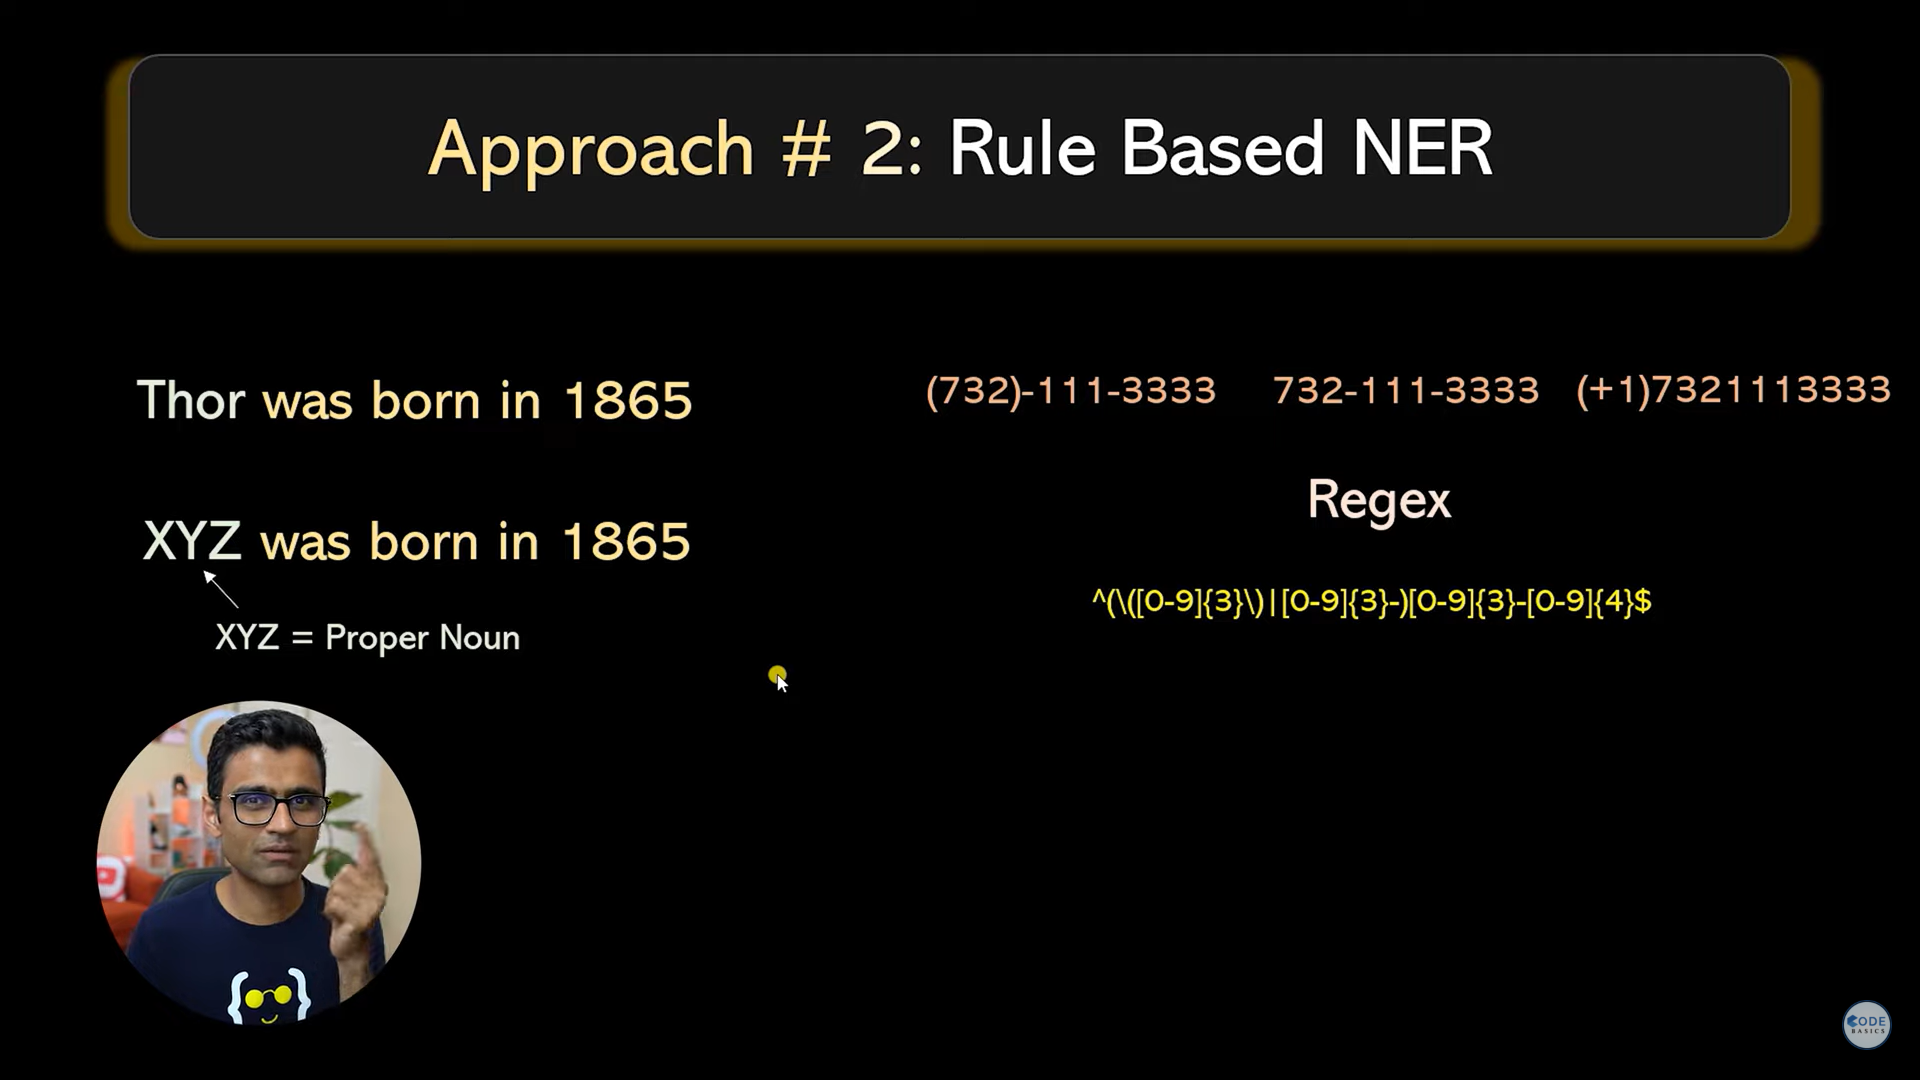
Defining rules to identify the entity.

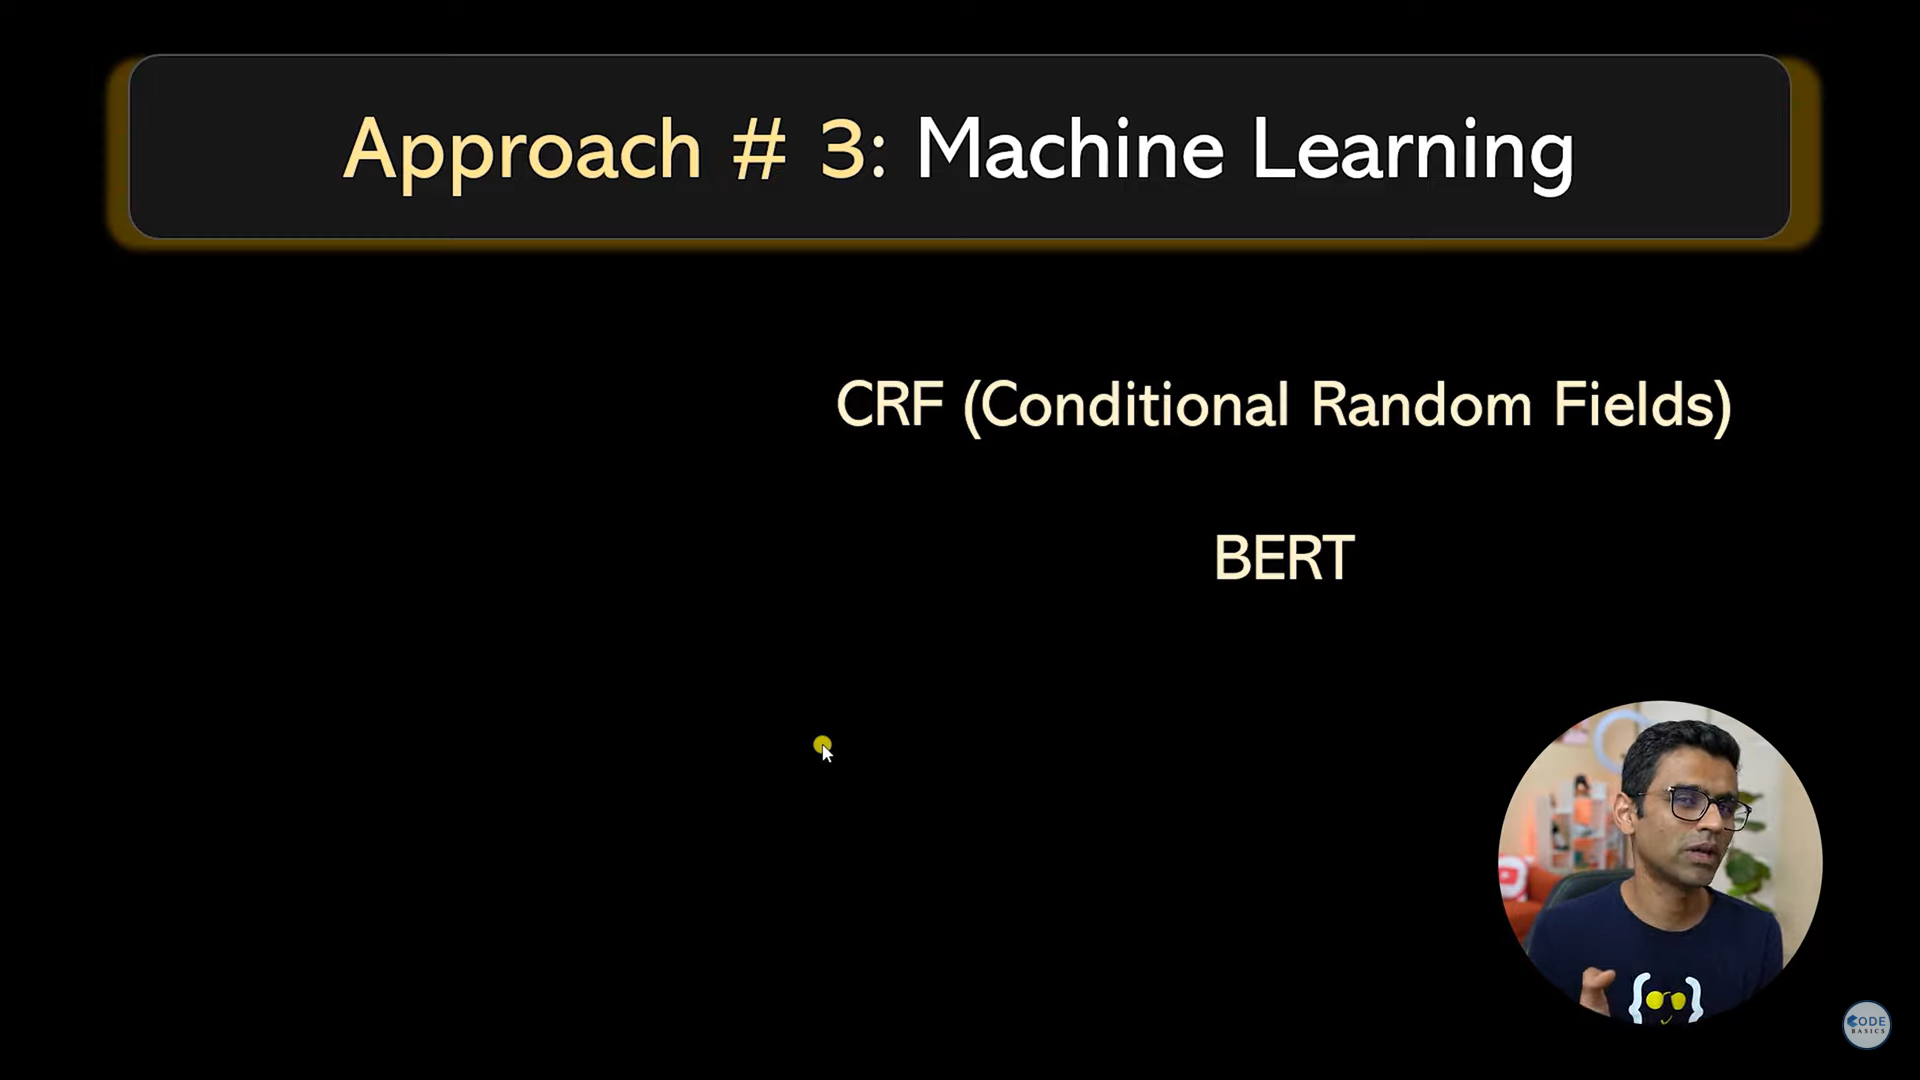
Using techniques such as CRF and BERT is another popular approach.

**Entity Ruler :** It is a class provided by spacy that can be used to define NER rules.  
link : https://spacy.io/api/entityruler

# Exercises

In [32]:
import spacy
nlp = spacy.load("en_core_web_sm")

C:\Users\Sharath chandra\AppData\Roaming\Python\Python38\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


**Exercise 1:** Extract all the Geographical (cities, Countries, states) names from a given text

In [33]:
text = """Kiran want to know the famous foods in each state of India. So, he opened Google and search for this question. Google showed that
in Delhi it is Chaat, in Gujarat it is Dal Dhokli, in Tamilnadu it is Pongal, in Andhrapradesh it is Biryani, in Assam it is Papaya Khar,
in Bihar it is Litti Chowkha and so on for all other states"""

doc = nlp(text)

In [35]:
locations=[]
for ent in doc.ents:
    if ent.label_=="GPE":
        locations.append(ent)
print("Geographical location names :",locations)

Geographical location names : [Kiran, India, Delhi, Gujarat, Pongal, Andhrapradesh, Assam, Bihar]


In [36]:
from spacy.tokens import Span
span1=Span(doc,0,1,label="Person")
doc.set_ents([span1],default='unmodified')

In [37]:
locations=[]
for ent in doc.ents:
    if ent.label_=="GPE":
        locations.append(ent)
print("Geographical location names :",locations)

Geographical location names : [India, Delhi, Gujarat, Pongal, Andhrapradesh, Assam, Bihar]


**Exercise 2 :** Extract all the birth dates of cricketers in the given Text

In [38]:
text = """Sachin Tendulkar was born on 24 April 1973, Virat Kholi was born on 5 November 1988, Dhoni was born on 7 July 1981
and finally Ricky ponting was born on 19 December 1974."""

doc = nlp(text)

In [39]:
birth_dates=[]
for ent in doc.ents:
    if ent.label_ == "DATE":
        birth_dates.append(ent)
print("All Birth Dates :",birth_dates)

All Birth Dates : [24 April 1973, 5 November 1988, 7 July 1981, 19 December 1974]
